Adam Whelpley

14 October 2024

CS379: Machine Learning

This code takes in data from kaggle that is composed of many candies, their characteristics, and how popular they are with the general public. The model will take in all of this data and generate a prediction model that allows users to submit 

Importing proper libraries to work with supervised machine learning. Matplotlib.pyplot will be used to graphing data for better human readability. Pandas will be used to read data from the csv and numpy will be used to manipulate the numbers to fit fomrattings required for the supervised learning library. Finally, libraries imported from sklearn will be used to build the linear regression model. 

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Load data for supervised learning model. Candy data includes some true or false values regarding the description of some candy, along with its popularity. The program aims to learn the popularity of candy based on these characteristics to be able to predict how popular new candy will be based on its characteristics. 

In [98]:
try:
    candyRawData = pd.read_csv("C:\\Users\\pwhel\\School\\Machine Learning\\Unit 2\\candy-data.csv")
except:
    print("File not found")

In [99]:
candyRawData

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


Taking in the data from the csv, an array of dictionaries can be built to give a classification of each candy.

In [100]:
# dict for each candy entry
candy = []

for i in range(1, len(candyRawData)):
    row = candyRawData.loc[i]
    thisCandy = {
        "competitorname" : row["competitorname"],
        "chocolate" : row["chocolate"],
        "fruity" : row["fruity"],
        "caramel" : row["caramel"],
        "peanutyalmondy" : row["peanutyalmondy"],
        "nougat" : row["nougat"],
        "crispedricewafer" : row["crispedricewafer"],
        "hard" : row["hard"],
        "bar" : row["bar"],
        "pluribus" : row["pluribus"],
        "sugarpercent" : row["sugarpercent"],
        "pricepercent" : row["pricepercent"],
        "winpercent" : row["winpercent"]
    }
    candy.append(thisCandy)

In [101]:
candy

[{'competitorname': '3 Musketeers',
  'chocolate': 1,
  'fruity': 0,
  'caramel': 0,
  'peanutyalmondy': 0,
  'nougat': 1,
  'crispedricewafer': 0,
  'hard': 0,
  'bar': 1,
  'pluribus': 0,
  'sugarpercent': 0.60399997,
  'pricepercent': 0.51099998,
  'winpercent': 67.602936},
 {'competitorname': 'One dime',
  'chocolate': 0,
  'fruity': 0,
  'caramel': 0,
  'peanutyalmondy': 0,
  'nougat': 0,
  'crispedricewafer': 0,
  'hard': 0,
  'bar': 0,
  'pluribus': 0,
  'sugarpercent': 0.011,
  'pricepercent': 0.116,
  'winpercent': 32.261086},
 {'competitorname': 'One quarter',
  'chocolate': 0,
  'fruity': 0,
  'caramel': 0,
  'peanutyalmondy': 0,
  'nougat': 0,
  'crispedricewafer': 0,
  'hard': 0,
  'bar': 0,
  'pluribus': 0,
  'sugarpercent': 0.011,
  'pricepercent': 0.51099998,
  'winpercent': 46.116505},
 {'competitorname': 'Air Heads',
  'chocolate': 0,
  'fruity': 1,
  'caramel': 0,
  'peanutyalmondy': 0,
  'nougat': 0,
  'crispedricewafer': 0,
  'hard': 0,
  'bar': 0,
  'pluribus': 0,

Plotting the trend between the price/sugar percent of candy to how popular it is.

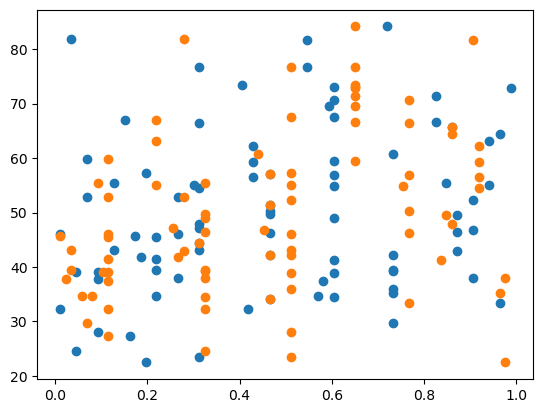

In [102]:
popularity = []
sugar = []
price = []

for comp in candy:
    popularity.append(comp['winpercent'])
    sugar.append(comp['sugarpercent'])
    price.append(comp['pricepercent'])

popularity = np.array(popularity)
sugar = np.array(sugar)
price = np.array(price)

# plotting sugar percentage to popularity

plt.scatter(sugar, popularity)

# plotting price percentage to popularity

plt.scatter(price, popularity)

plt.show()

Including this data along with the characteristics to build the prediction model. The model will be fed whether or not the candy is:
chocolate
fruity
caramel
nutty
nougat	
crispedricewafer	
hard	
bar	
has many candies in one packaging

As well as the sugarpercent	and pricepercent.

From here a model will be generated and built. Once the model is built, we will be able to use it to predict the popularity of new candies.

In [103]:
# fit data into the supervised algorithm
X = []
Y = []

for comp in candy:
    X.append([
        comp['chocolate'], 
        comp['fruity'], 
        comp['caramel'], 
        comp['peanutyalmondy'], 
        comp['nougat'], 
        comp['crispedricewafer'], 
        comp['hard'], 
        comp['bar'], 
        comp['pluribus'],
        comp['sugarpercent'], 
        comp['pricepercent']])
    Y.append(comp['winpercent'])

X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [104]:
# verifying the modeling worked the way it was supposed to
X_train.shape, Y_train.shape

((67, 11), (67,))

In [105]:
model = linear_model.LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

Generating predictions based on the test model and comparing it back to the Y test to ensure the data is syncing

In [106]:
Y_predict = model.predict(X_test)

In [107]:
Y_predict

array([50.67042315, 35.67697202, 63.58322351, 58.71180572, 63.19762625,
       41.42298469, 58.25668682, 39.89291745, 36.243115  , 66.31178378,
       43.97469443, 53.97918846, 59.19100313, 45.08247486, 46.39686774,
       44.09896137, 43.41295406])

In [108]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_predict))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_predict))

Coefficients: [ 24.11372356   7.98962764  -1.66644095   7.34646948   7.03198706
   5.01949529  -5.62403089  -1.92739957   0.32450844   6.92849931
 -10.06154708]
Intercept: 38.050109718717124
Mean squared error (MSE): 196.43
Coefficient of determination (R^2): -0.14


Using this model we can predict the popularity of new candy types.
Here, I have generated some new fake data and inputed it into the same model.
Then I plotted the data to another graph including the new candy to make sure that the new candy fits in with the trend.

In [109]:
newCandy = [
    {
        'competitorname': 'My Candy',
        'chocolate': 0,
        'fruity': 0,
        'caramel': 0,
        'peanutyalmondy': 1,
        'nougat': 1,
        'crispedricewafer': 1,
        'hard': 0,
        'bar': 1,
        'pluribus': 0,
        'sugarpercent': 0.60,
        'pricepercent': 0.20
    },
    {
        'competitorname': 'Boo Bars',
        'chocolate': 1,
        'fruity': 0,
        'caramel': 1,
        'peanutyalmondy': 0,
        'nougat': 0,
        'crispedricewafer': 0,
        'hard': 1,
        'bar': 1,
        'pluribus': 0,
        'sugarpercent': 0.9051023,
        'pricepercent': 0.1561198
    },
    {
        'competitorname': 'High Class',
        'chocolate': 1,
        'fruity': 1,
        'caramel': 0,
        'peanutyalmondy': 1,
        'nougat': 0,
        'crispedricewafer': 0,
        'hard': 0,
        'bar': 1,
        'pluribus': 1,
        'sugarpercent': 0.5613,
        'pricepercent': 0.9213
    }
]

X = []

for comp in newCandy:
    X.append([
        comp['chocolate'], 
        comp['fruity'], 
        comp['caramel'], 
        comp['peanutyalmondy'], 
        comp['nougat'], 
        comp['crispedricewafer'], 
        comp['hard'], 
        comp['bar'], 
        comp['pluribus'],
        comp['sugarpercent'], 
        comp['pricepercent']])

winpercent = model.predict(X)
count = 0
for comp in newCandy:
    comp['winpercent'] = winpercent[count]
    count += 1

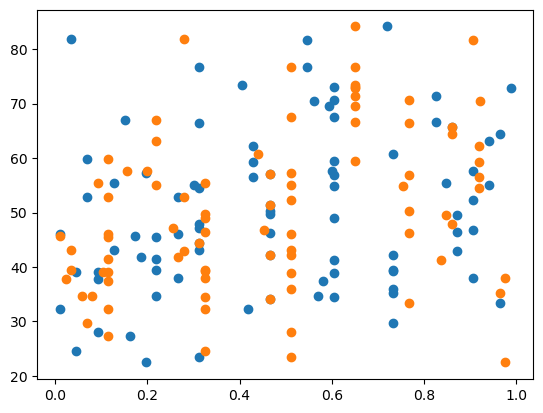

In [111]:
popularity = []
sugar = []
price = []

for c in newCandy:
    candy.append(c)

for comp in candy:
    popularity.append(comp['winpercent'])
    sugar.append(comp['sugarpercent'])
    price.append(comp['pricepercent'])

popularity = np.array(popularity)
sugar = np.array(sugar)
price = np.array(price)

# plotting sugar percentage to popularity

plt.scatter(sugar, popularity)

# plotting price percentage to popularity

plt.scatter(price, popularity)

plt.show()